In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/mtcars.csv"
CarData = pd.read_csv(url)
CarData.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


Here is the dictionary of our data: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html

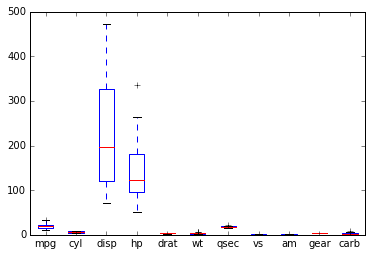

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
CarData.plot(kind = 'box')

In [3]:
Q1_hp = CarData['hp'].quantile(.25)  #Here is first Quartilefor hp
Q3_hp = CarData['hp'].quantile(.75)  #Here is third Quartile for hp
IQR_hp = Q3_hp - Q1_hp  

#### Let's get rid of outliers

In [4]:
CarData.drop(CarData[(CarData['hp'] > Q3_hp + 1.5*IQR_hp) |
                     (CarData['hp'] < Q1_hp - 1.5*IQR_hp) ].index
                        , inplace = True)

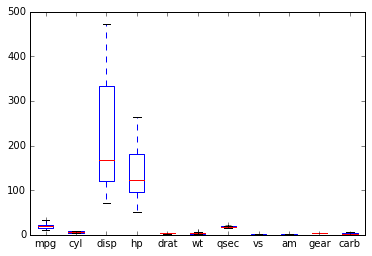

In [5]:
CarData.plot(kind = 'box')

#### Great! We have an outlier free dataset to work with!

## First: Create a correlation matrix and explore it

#### What do we learn from this Corr() Matrix?

Answer: 

### Let's draw scatter plot and regression plot of Mileage Per Gallon (y) vs horse power (x)

In [ ]:
#Scatter plot


In [ ]:
#regression plot
import seaborn as sns


#### How do you interpret these graphs?

Answer: 

#### Now let's find build a regression line. Use hp to predict mpg

#### Write down the formula for your regression line

Answer: 

#### Interpret the coefficient of hp

Answer: 

#### Let's make predictions for two cars VW Jetta and Bugatti Veyron . VW jetta has 170 hp and Bugatti Veyron has 1200 hp. What are your predictions for these two cars?

Answer: 

#### Now let's work with categorical data

Let's first create dummy variables for weight of cars. Let's categorize Cars based on weight. Those cars that are heavier than 75% of cars are going to be called "Heavy", those which are heavier than 25% of cars but lighter than the heaviest 25% cars are going to be Called "Medium" and finally, the lightest 25% cars are called "Light".

In [ ]:
mask_Heavy = (CarData['wt'] > CarData['wt'].quantile(0.75))
mask_Light = (CarData['wt'] < CarData['wt'].quantile(0.25))
CarData['wt_category'] = 'Medium'
CarData.loc[mask_Heavy,'wt_category'] = 'Heavy'
CarData.loc[mask_Light,'wt_category'] = 'Light'
CarData.head()

In [ ]:
WeightDummy = pd.get_dummies(CarData.wt_category)
del WeightDummy['Light']
CarData = pd.concat([CarData,WeightDummy],axis = 1)
CarData.head()

In [ ]:
#Now let's visualize association between mpg and weight
CarData.boxplot(column = 'mpg', by = 'wt_category') 

#### Does the abox boxplot make sense? Why it does or why it does not?

Answer: 

#### Apply a multivariable regression line to discover relationship between mpg and weight categories. Print your outcomes.

#### Write your regression line

Answer: 

#### Please interpret your above results

Answer: 

** Without using perdict function, predict the average mpg of light, heavy and medium cars **

Answer:


** Now let's use predict function to predict mpg for light, heavy and medium cars **